https://colab.research.google.com/drive/1fZCdIg5M91CHhTmDVfGwo8BV4sqLrnGb?usp=sharing

#CP 4.1.5


A =
 [[1.   0.59]
 [1.   0.8 ]
 [1.   0.95]
 [1.   0.45]
 [1.   0.79]
 [1.   0.99]
 [1.   0.9 ]
 [1.   0.65]
 [1.   0.79]
 [1.   0.69]
 [1.   0.79]
 [1.   0.49]
 [1.   1.09]
 [1.   0.95]
 [1.   0.79]
 [1.   0.65]
 [1.   0.45]
 [1.   0.6 ]
 [1.   0.89]
 [1.   0.79]
 [1.   0.99]
 [1.   0.85]]
b =
 [[3980.]
 [2200.]
 [1850.]
 [6100.]
 [2100.]
 [1700.]
 [2000.]
 [4200.]
 [2440.]
 [3300.]
 [2300.]
 [6000.]
 [1190.]
 [1960.]
 [2760.]
 [4330.]
 [6960.]
 [4160.]
 [1990.]
 [2860.]
 [1920.]
 [2160.]]
x =
 [[ 9510.09957156]
 [-8314.36447574]]
[ Ax, b ] =
 [[4604.62453087 3980.        ]
 [2858.60799097 2200.        ]
 [1611.45331961 1850.        ]
 [5768.63555747 6100.        ]
 [2941.75163572 2100.        ]
 [1278.87874058 1700.        ]
 [2027.17154339 2000.        ]
 [4105.76266233 4200.        ]
 [2941.75163572 2440.        ]
 [3773.1880833  3300.        ]
 [2941.75163572 2300.        ]
 [5436.06097844 6000.        ]
 [ 447.442293   1190.        ]
 [1611.45331961 1960.        ]
 [2941.75163572

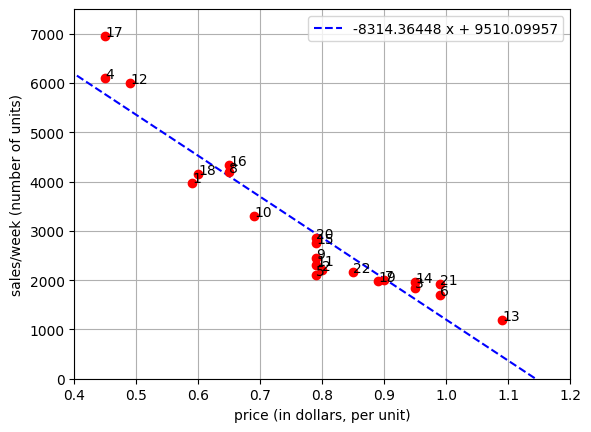

The optimal selling price is $ 0.6869
The total profit is $ 1735.75  per week


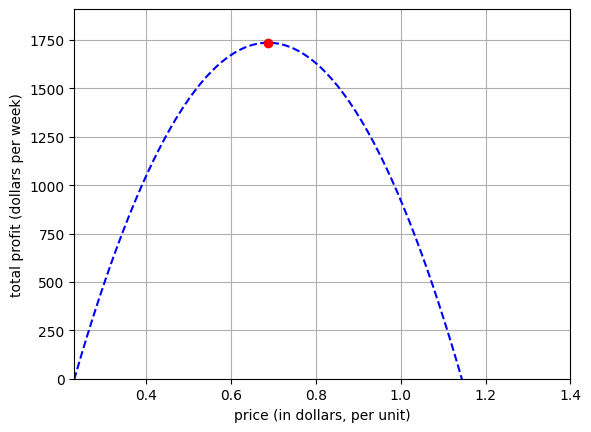

In [10]:
# ---------------------
# Exercise CP.4.1.5
# ---------------------
#
# A company test-markets a new soft drink in 22 cities of approximately equal
# size. The selling price (in dollars) and the number sold per week in the
# cities are listed as follows:
#    -----------------------------
#    | city | price | sales/week |
#    |------|------ |------------|
#    |   1  |  0.59 |    3980    |
#    |   2  |  0.80 |    2200    |
#    |   3  |  0.95 |    1850    |
#    |   4  |  0.45 |    6100    |
#    |   5  |  0.79 |    2100    |
#    |   6  |  0.99 |    1700    |
#    |   7  |  0.90 |    2000    |
#    |   8  |  0.65 |    4200    |
#    |   9  |  0.79 |    2440    |
#    |  10  |  0.69 |    3300    |
#    |  11  |  0.79 |    2300    |
#    |  12  |  0.49 |    6000    |
#    |  13  |  1.09 |    1190    |
#    |  14  |  0.95 |    1960    |
#    |  15  |  0.79 |    2760    |
#    |  16  |  0.65 |    4330    |
#    |  17  |  0.45 |    6960    |
#    |  18  |  0.60 |    4160    |
#    |  19  |  0.89 |    1990    |
#    |  20  |  0.79 |    2860    |
#    |  21  |  0.99 |    1920    |
#    |  22  |  0.85 |    2160    |
#    -----------------------------
#
# (a) First, the company wants to find the ``demand curve'': how many it will sell at
# each potential price. Let $P$ denote price and $S$ denote sales per week. Find the
# line $S = c_1 + c_2 P$ that best fits the data from the table in the sense of least
# squares. Find the normal equations and the coefficients $c_1$ and $c_2$ of the least
# squares line. Plot the least squares line along with the data, and calculate
# the root mean square error.
#
# (b) After studying the results of the test marketing, the company will set a
# single selling price $P$ throughout the country. Given a manufacturing cost of
# $0.23 per unit, the total profit (per city, per week) is $S(P - 0.23)$
# dollars. Use the results of the preceding least squares approximation to find
# the selling price for which the company's profit will be maximized.
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

# ----------------------------
# Data from the problem
# ----------------------------

data = np.array([
   [  1., 0.59, 3980. ],
   [  2., 0.80, 2200. ],
   [  3., 0.95, 1850. ],
   [  4., 0.45, 6100. ],
   [  5., 0.79, 2100. ],
   [  6., 0.99, 1700. ],
   [  7., 0.90, 2000. ],
   [  8., 0.65, 4200. ],
   [  9., 0.79, 2440. ],
   [ 10., 0.69, 3300. ],
   [ 11., 0.79, 2300. ],
   [ 12., 0.49, 6000. ],
   [ 13., 1.09, 1190. ],
   [ 14., 0.95, 1960. ],
   [ 15., 0.79, 2760. ],
   [ 16., 0.65, 4330. ],
   [ 17., 0.45, 6960. ],
   [ 18., 0.60, 4160. ],
   [ 19., 0.89, 1990. ],
   [ 20., 0.79, 2860. ],
   [ 21., 0.99, 1920. ],
   [ 22., 0.85, 2160. ]])

xx = data[:,1]
yy = data[:,2]

A = np.array([ np.ones(xx.shape), xx ]).T
b = yy.reshape(-1,1)

print("A =\n", A)
print("b =\n", b)

# ----------------------------
# TODO 1: compute x using least squares
# ----------------------------

# Least squares fit:
x = np.linalg.lstsq(A, b, rcond=None)[0]

# Or alternatively, the normal equations:
# x = np.linalg.solve(A.T @ A, A.T @ b)

print("x =\n", x)
print("[ Ax, b ] =\n", np.concatenate((A @ x, b), axis=1))

# Compute residual
r = b - A @ x
print("r =\n", r)
print("|| b - Ax ||_2 = ", f"{np.linalg.norm(r, 2):.4f}")
print("RMSE = ", f"{np.linalg.norm(r, 2) / sqrt(A.shape[0]):.4f}")
print("|| A^T (b - Ax) ||_∞ = ",
      f"{np.linalg.norm(A.T @ (A @ x - b), np.inf):.1e}")

# Plot fitted line
xxx = np.linspace(0.3, 1.2, 100)
yyy = x[0] + x[1] * xxx

plt.plot(xxx, yyy, '--b', label=f'{x[1,0]:.5f} x + {x[0,0]:.5f}')
plt.plot(xx, yy, 'ro')
[plt.text(xx[i], yy[i], f"{int(data[i,0])}") for i in range(data.shape[0])]
plt.legend()
plt.xlabel('price (in dollars, per unit)')
plt.ylabel('sales/week (number of units)')
plt.xlim([0.4, 1.2])
plt.ylim([0., 7500.])
plt.grid()
plt.show()

# ----------------------------
# TODO 2: change the manufacturing cost
# ----------------------------

manufacturing_cost = 0.23

# Compute the price x_opt that maximizes profit
# Optimal price satisfies: d(profit)/d(price) = 0
# Profit = (price - manufacturing_cost) * (x[0] + x[1] * price)
# Take derivative and set to zero:
# 0 = (x[0] + x[1] * price) + (price - manufacturing_cost) * x[1]
# Solve for price:

x_opt = (manufacturing_cost - x[0] / x[1]) / 2.
y_opt = (x[0] + x[1] * x_opt) * (x_opt - manufacturing_cost)

print("The optimal selling price is $", f"{x_opt[0]:.4f}")
print("The total profit is $", f"{y_opt[0]:.2f}", " per week")

# Plot total profit
xxx = np.linspace(0., 1.4, 200)
total_profit = (x[0] + x[1] * xxx) * (xxx - manufacturing_cost)

plt.plot(xxx, total_profit, '--b')
plt.xlim([manufacturing_cost, 1.4])
plt.ylim([0., max(total_profit)*1.1])
plt.plot(x_opt, y_opt, 'or')
plt.xlabel('price (in dollars, per unit)')
plt.ylabel('total profit (dollars per week)')
plt.grid()
plt.show()


#CP. 4.2.6

RMSE =  0.0341


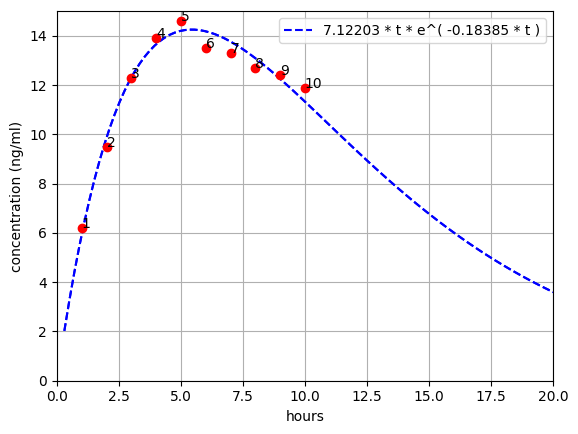

In [11]:
# ---------------------
# Exercise CP.4.2.6
# ---------------------
#
# The bloodstream concentration of a drug, measured hourly after administration, is given
# in the accompanying table. Fit the model $$ y = c_1 t e^{c_2t}.$$ (See equation (4.21).)
# Find the estimated maximum and the half-life. Suppose that the therapeutic range for the
# drug is 4--15 ng/ml. Use the equation solver of your choice to extimate the time the drug
# concentration stays within therapeutic levels.
#
#    --------------------------------|
#    | hours | concentration (ng/ml) |
#    |-------|-----------------------|
#    |    1  |   6.2                 |
#    |    2  |   9.5                 |
#    |    3  |  12.3                 |
#    |    4  |  13.9                 |
#    |    5  |  14.6                 |
#    |    6  |  13.5                 |
#    |    7  |  13.3                 |
#    |    8  |  12.7                 |
#    |    9  |  12.4                 |
#    |   10  |  11.9                 |
#    --------------------------------|
#

import numpy as np
from math import sqrt
from math import exp
import matplotlib.pyplot as plt

data = np.array([
   [  1.,  6.2 ],
   [  2.,  9.5 ],
   [  3., 12.3 ],
   [  4., 13.9 ],
   [  5., 14.6 ],
   [  6., 13.5 ],
   [  7., 13.3 ],
   [  8., 12.7 ],
   [  9., 12.4 ],
   [ 10., 11.9 ]])

xx = data[:,0]
yy = data[:,1]

A = np.array([ np.ones( xx.shape ), xx ]).T
b = np.array([ np.log(yy) - np.log(xx) ]).T
# print("A =\n",A)
# print("b =\n",b)

x = np.linalg.lstsq(A,b,rcond=None)[0]

# print("x =\n",x)
# print("[ Ax, b ]=\n",np.concatenate((A@x,b),axis=1))
r = b - A@x
# print("r =\n",r)
# print("|| b - Ax ||_2 = ", f"{np.linalg.norm( r, 2 ):.4f}")
print("RMSE = ", f"{np.linalg.norm( r, 2 ) / sqrt( A.shape[0] ) :.4f}")
# print("|| A^T ( b - Ax ) ||_oo =",
#      f"{np.linalg.norm( A.T@( A@x - b), np.inf ):.1e}" )

xxx = np.linspace( 0.3, 20.3, 100)
yyy = np.zeros(xxx.shape[0])
for i in range(0,xxx.shape[0]):
  yyy[i] = exp(x[0,0]) * xxx[i] * exp( x[1,0] * xxx[i] )

plt.plot(xxx, yyy, '--b',label=f'{exp(x[0,0]):7.5f}'+' * t * e^( '+f'{x[1,0]:7.5f}'+' * t )' )
plt.plot(xxx, yyy, '--b' )
plt.plot( xx, yy, 'ro')
[ plt.text( xx[i], yy[i], f"{data[i,0]:.0f}") for i in range(0,data.shape[0]) ]
plt.legend()
plt.xlabel('hours')
plt.ylabel('concentration (ng/ml)')
plt.xlim([ 0., 20. ])
plt.ylim([ 0., 15.])
plt.grid()
plt.show()

#CP.4.2.7



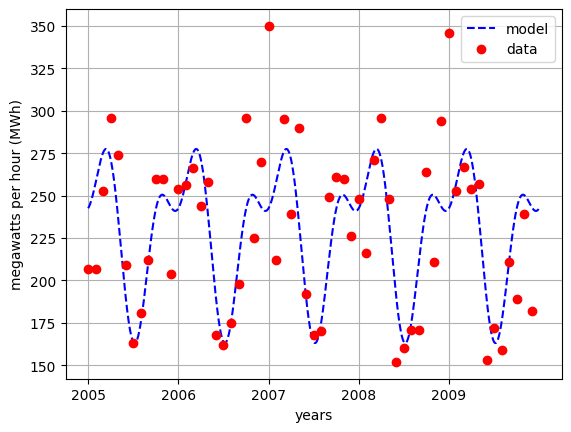

In [12]:
# ---------------------
# Exercise CP.4.2.7
# ---------------------
#
#
# The file windmill.txt, available from the textbook website, is a list of 60 numbers
# which represent the monthly megawatt-hours generated from Jan. 2005 to Dec. 2009 by a wind turbine
# owned by Minnkota Power Cooperative near Valley City, ND. The data is currently available
# at http:www.minnkota.com. For reference, a typical home uses around 1MWh per month.
#
# (a) Find a rough model of power output as a yearly periodic function. Fit the data to equation (4.9),
#          $$ f(t) = c_1 + c_2 \cos 2 \pi t + c_3 \sin 2 \pi t + c_4 \cos 4 \pi t  $$
#     where the units of $t$ are years, that is $0\leq t\leq 5$, and write down the resulting function.
#
# (b) Plot the data and the model function for years $0\leq t\leq 5$. What features of
#     the data are captured by the model?
#
#         Production in megawatt-hours generated
#         from Jan. 2005 to Dec. 2009.
#        ------------------------------------
#        | 2005 | 2006 | 2007 | 2008 | 2009 |
# -------------------------------------------
# | Jan. |  207 |  254 |  350 |  248 |  346 |
# | Feb. |  207 |  256 |  212 |  216 |  253 |
# | Mar. |  253 |  266 |  295 |  271 |  267 |
# | Apr. |  296 |  244 |  239 |  296 |  254 |
# | May  |  274 |  258 |  290 |  248 |  257 |
# | Jun. |  209 |  168 |  192 |  152 |  153 |
# | Jul. |  163 |  162 |  168 |  160 |  172 |
# | Aug. |  181 |  175 |  170 |  171 |  159 |
# | Sep. |  212 |  198 |  249 |  171 |  211 |
# | Oct. |  260 |  296 |  261 |  264 |  189 |
# | Nov. |  260 |  225 |  260 |  211 |  239 |
# | Dec. |  204 |  270 |  226 |  294 |  182 |
# -------------------------------------------

import numpy as np
from math import cos
from math import sin
from math import pi
from math import sqrt
import matplotlib.pyplot as plt

b = np.array([
 [207.],
 [207.],
 [253.],
 [296.],
 [274.],
 [209.],
 [163.],
 [181.],
 [212.],
 [260.],
 [260.],
 [204.],
 [254.],
 [256.],
 [266.],
 [244.],
 [258.],
 [168.],
 [162.],
 [175.],
 [198.],
 [296.],
 [225.],
 [270.],
 [350.],
 [212.],
 [295.],
 [239.],
 [290.],
 [192.],
 [168.],
 [170.],
 [249.],
 [261.],
 [260.],
 [226.],
 [248.],
 [216.],
 [271.],
 [296.],
 [248.],
 [152.],
 [160.],
 [171.],
 [171.],
 [264.],
 [211.],
 [294.],
 [346.],
 [253.],
 [267.],
 [254.],
 [257.],
 [153.],
 [172.],
 [159.],
 [211.],
 [189.],
 [239.],
 [182.]
])

t = np.zeros( 60 )
for i in range(0,60):
  t[i] = i / 12.

A = np.zeros( [ 60, 4 ] )
A[:,0] = np.ones( 60 )
A[:,1] = np.cos(2*pi*t)
A[:,2] = np.sin(2*pi*t)
A[:,3] = np.cos(4*pi*t)


#print("A =\n",A)
#print("b =\n",b)

x = np.linalg.lstsq(A,b,rcond=None)[0]

#print("x =\n",x)
#print("[ Ax, b ]=\n",np.concatenate((A@x,b),axis=1))
r = b - A@x
#print("r =\n",r)
#print("|| b - Ax ||_2 = ", f"{np.linalg.norm( r, 2 ):.4f}")
#print("RMSE = ", f"{np.linalg.norm( r, 2 ) / sqrt( A.shape[0] ) :.4f}")
#print("|| A^T ( b - Ax ) ||_oo =",
#      f"{np.linalg.norm( A.T@( A@x - b), np.inf ):.1e}" )

xxx = np.linspace( 0., 5., 1000)
yyy = x[0] + x[1] * np.cos(2*pi*xxx) + x[2] * np.sin(2*pi*xxx) + x[3] * np.cos(4*pi*xxx)

plt.plot(xxx, yyy, '--b', label='model' )
plt.plot(  t,   b, 'ro', label='data')

plt.legend()
plt.xlabel('years')
plt.ylabel('megawatts per hour (MWh)')
#plt.xlim([ 0., 20. ])
#plt.ylim([ 0., 15.])
plt.grid()
plt.xticks(np.arange(5), ['2005','2006','2007','2008','2009'])
plt.show()

#CP 4.2.8

RMSE =  0.0161


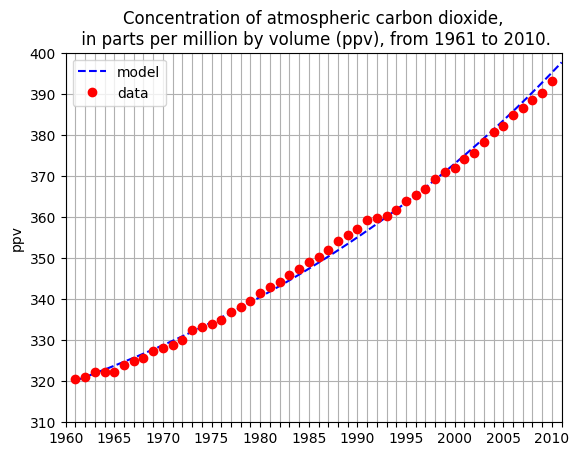

In [13]:
# ---------------------
# Exercise CP.4.2.8
# ---------------------
#
#
# The file scrippsy.txt, available from the textbook website, is a list of 50 numbers
# which represent the concentration of atmospheric carbon dioxide, in parts per million by volume (ppv),
# recorded at Mauna Loa, Hawaii, each May 15 of the years 1961 to 2010. The data is part of a data collection
# effort initiated by Charles Keeling of the Scripps Oceanographic Institute (Keeling et al. [2001]).
# Subtract the background level of 279 ppm as in Computer Problem 4, and fit the data to an exponential model.
# Plot the data along with the best fit exponential function and report RMSE.
#
# ---------------------------------------------------------------------------------------
# || year . ppm    || year . ppm    || year . ppm    || year . ppm    || year . ppm    ||
# ---------------------------------------------------------------------------------------
# || 1961 . 320.58 || 1971 . 328.92 || 1981 . 342.91 || 1991 . 359.34 || 2001 . 374.02 ||
# || 1962 . 321.01 || 1972 . 330.07 || 1982 . 344.14 || 1992 . 359.66 || 2002 . 375.55 ||
# || 1963 . 322.25 || 1973 . 332.48 || 1983 . 345.75 || 1993 . 360.28 || 2003 . 378.35 ||
# || 1964 . 322.24 || 1974 . 333.09 || 1984 . 347.43 || 1994 . 361.68 || 2004 . 380.61 ||
# || 1965 . 322.16 || 1975 . 333.97 || 1985 . 348.93 || 1995 . 363.79 || 2005 . 382.24 ||
# || 1966 . 324.01 || 1976 . 334.87 || 1986 . 350.21 || 1996 . 365.41 || 2006 . 384.94 ||
# || 1967 . 325.00 || 1977 . 336.75 || 1987 . 351.84 || 1997 . 366.80 || 2007 . 386.43 ||
# || 1968 . 325.57 || 1978 . 338.01 || 1988 . 354.22 || 1998 . 369.30 || 2008 . 388.49 ||
# || 1969 . 327.34 || 1979 . 339.47 || 1989 . 355.67 || 1999 . 371.00 || 2009 . 390.18 ||
# || 1970 . 328.07 || 1980 . 341.46 || 1990 . 357.16 || 2000 . 371.82 || 2010 . 393.22 ||
# ---------------------------------------------------------------------------------------
# Concentration of atmospheric carbon dioxide, in parts per million by volume
# (ppv), from 1961 to 2010.

import numpy as np
from math import exp
from math import sqrt
import matplotlib.pyplot as plt

y = np.array([
  [320.58],
  [321.01],
  [322.25],
  [322.24],
  [322.16],
  [324.01],
  [325.00],
  [325.57],
  [327.34],
  [328.07],
  [328.92],
  [330.07],
  [332.48],
  [333.09],
  [333.97],
  [334.87],
  [336.75],
  [338.01],
  [339.47],
  [341.46],
  [342.91],
  [344.14],
  [345.75],
  [347.43],
  [348.93],
  [350.21],
  [351.84],
  [354.22],
  [355.67],
  [357.16],
  [359.34],
  [359.66],
  [360.28],
  [361.68],
  [363.79],
  [365.41],
  [366.80],
  [369.30],
  [371.00],
  [371.82],
  [374.02],
  [375.55],
  [378.35],
  [380.61],
  [382.24],
  [384.94],
  [386.43],
  [388.49],
  [390.18],
  [393.22]
])

yshift = y - 279.

t = np.zeros( 50 )
for i in range(0,50):
  t[i] = i

A = np.array([ np.ones( t.shape ), t ]).T
b = np.log(yshift)

x = np.linalg.lstsq(A,b,rcond=None)[0]

r = b - A@x

print("RMSE = ", f"{np.linalg.norm( r, 2 ) / sqrt( A.shape[0] ) :.4f}")

xxx = np.linspace( 0., 50., 1000)
yyy = 279 + exp(x[0,0]) * np.exp( x[1,0] * xxx )

plt.plot(xxx, yyy, '--b', label='model' )
plt.plot(  t,   y, 'ro', label='data')

plt.title('Concentration of atmospheric carbon dioxide,\n in parts per million by volume (ppv), from 1961 to 2010.')

plt.legend()
#plt.xlabel('years')
plt.ylabel('ppv')
plt.xlim([ -1., 50. ])
plt.ylim([ 310., 400.])
plt.grid()
plt.xticks(np.arange(-1,51), [
'1960','','','','','1965','','','','','1970','','','','','1975','','','','',
'1980','','','','','1985','','','','','1990','','','','','1995','','','','',
'2000','','','','','2005','','','','','2010',''])
plt.show()

#CP.4.2.9

=== Part (a) ===
Coefficients c_i: [82.1603  1.9507 -0.2257  2.943 ]
RMSE = 0.8015


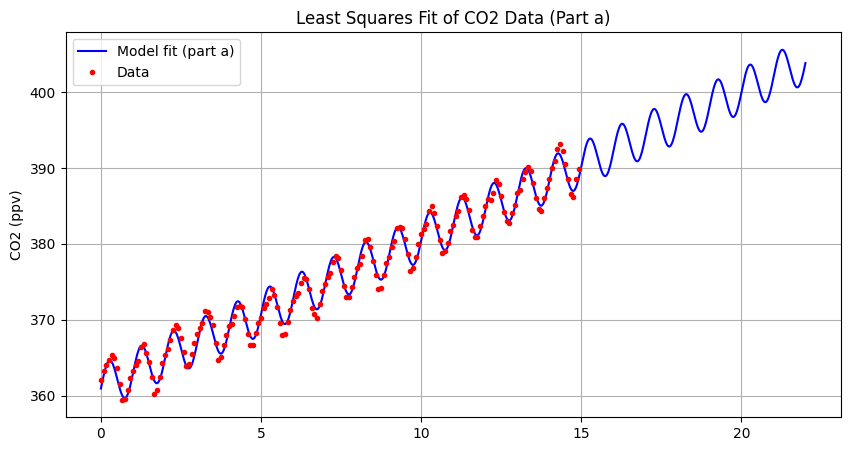


=== Part (b) Predictions ===
Month 1: Predicted = 380.077, Actual = 380.630, Error = -0.553
Month 2: Predicted = 375.630, Actual = 374.060, Error = +1.570
Month 3: Predicted = 382.028, Actual = 382.450, Error = -0.422
Month 4: Predicted = 377.581, Actual = 376.730, Error = +0.851

=== Part (c) ===
RMSE with cos(4π t) = 0.7431

=== Part (d) ===
RMSE with t^2 = 0.765

=== Part (e) ===
Coefficients with both terms: [ 8.2678e+01  1.7394e+00 -2.2700e-01  2.9436e+00  4.2420e-01  1.4200e-02]
RMSE with both terms = 0.7038


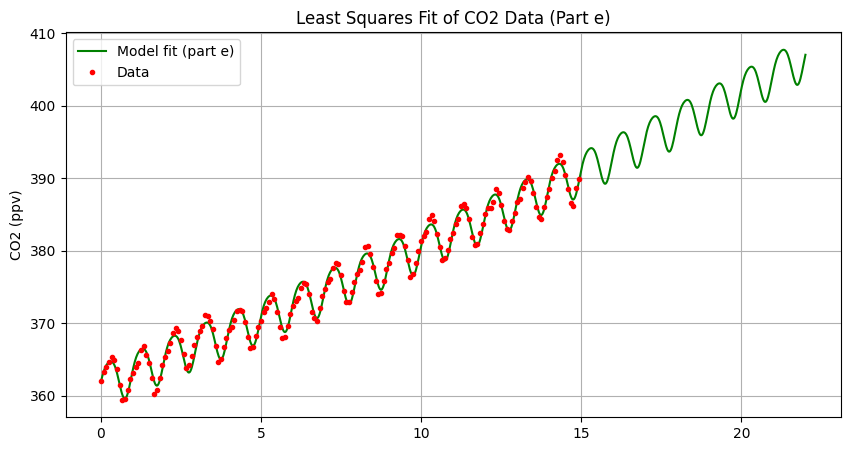


=== Summary of RMSEs ===
Part (a): RMSE = 0.8015
Part (c): RMSE = 0.7431
Part (d): RMSE = 0.7650
Part (e): RMSE = 0.7038


In [14]:
# ---------------------
# Exercise CP.4.2.9
# ---------------------
#
#
# The file scrippsm.txt, available from the textbook website, is a list of 180 numbers
# which represent the concentration of atmospheric carbon dioxide, in parts per million by volume (ppv),
# recorded monthly at Mauna Loa from Jan. 1996 to Dec. 2010, taken from the same Scripps study as Computer Problem 8.
#
# (a) Carry out a least squares fit of the CO$_\textmd{2}$ data using the model
#       f(t) = c_1 + c_2 t + c_3 cos( 2 pi t ) + c_4  sin( 2 pi t )
# where `t` is measured in months. Report the best fit coefficients `c_i` and the RMSE of the fit.
# Plot the continuous curve from Jan. 1989 to the end of this year, including the 180 data points in the plot.
#
# (b) Use your model to predict the CO2 concentration in May 2004, Sept. 2004, May 2005, and Sept. 2005.
# These months tend to contain the yearly maxima and mimima of the CO2$ cycle. The actual recorded values
# are 380.63, 374.06, 382.45, and 376.73 ppv, respectively. Report the model error at these four points.
#
# (c) Add the extra term `c_5 cos( 4 pi t )` and redo part (a) and (b). Compare the new RMSE and the four model errors.
#
# (d) Repeat part (c) using the extra term `c_5 t^2`. Which terms lead to more improvement in the model, part(c) or (d)?
#
# (e) Add both terms from (c) and (d) and redo parts (a) and (b). Prepare a table summarizing your results from all parts
# of the problem, and try to provide an explanation for the results.
#
# See the website http://scrippsco2.ucsd.edu for much more data and analysis of the Scripps carbon dioxide study.
#
#        ----------------------------------------------------------------------------------------------------------------------------------------
#        | 1996   | 1997   | 1998   | 1999   | 2000   | 2001   | 2002   | 2003   | 2004   | 2005   | 2006   | 2007   | 2008   | 2009   | 2010   |
# -----------------------------------------------------------------------------------------------------------------------------------------------
# | Jan. | 362.05 | 363.18 | 365.32 | 368.15 | 369.14 | 370.28 | 372.43 | 374.68 | 376.78 | 378.34 | 381.37 | 382.49 | 385.02 | 386.71 | 388.56 |
# | Feb. | 363.25 | 364.00 | 366.15 | 368.87 | 369.46 | 371.50 | 373.09 | 375.63 | 377.36 | 379.66 | 382.02 | 383.72 | 385.87 | 387.17 | 389.98 |
# | Mar. | 364.02 | 364.57 | 367.31 | 369.59 | 370.52 | 372.12 | 373.52 | 376.11 | 378.40 | 380.38 | 382.63 | 384.33 | 385.85 | 388.62 | 390.99 |
# | Apr. | 364.72 | 366.35 | 368.61 | 371.14 | 371.66 | 372.87 | 374.86 | 377.65 | 380.50 | 382.14 | 384.40 | 386.23 | 386.77 | 389.51 | 392.52 |
# | May  | 365.41 | 366.80 | 369.30 | 371.00 | 371.82 | 374.02 | 375.55 | 378.35 | 380.61 | 382.24 | 384.94 | 386.43 | 388.49 | 390.18 | 393.22 |
# | Jun. | 364.97 | 365.62 | 368.87 | 370.35 | 371.70 | 373.30 | 375.40 | 378.13 | 379.55 | 382.10 | 384.08 | 385.87 | 387.92 | 389.60 | 392.29 |
# | Jul. | 363.65 | 364.47 | 367.64 | 369.27 | 370.12 | 371.62 | 374.02 | 376.61 | 377.77 | 380.66 | 382.37 | 384.44 | 386.32 | 388.01 | 390.49 |
# | Aug. | 361.48 | 362.51 | 365.78 | 366.93 | 368.12 | 369.55 | 371.49 | 374.49 | 375.84 | 378.68 | 380.48 | 381.84 | 384.17 | 386.07 | 388.55 |
# | Sep. | 359.45 | 360.19 | 363.90 | 364.63 | 366.62 | 367.96 | 370.71 | 372.98 | 374.05 | 376.40 | 378.78 | 380.86 | 383.00 | 384.61 | 386.54 |
# | Oct. | 359.60 | 360.77 | 364.23 | 365.13 | 366.73 | 368.09 | 370.25 | 373.00 | 374.22 | 376.79 | 379.07 | 380.88 | 382.81 | 384.34 | 386.21 |
# | Nov. | 360.76 | 362.43 | 365.46 | 366.68 | 368.29 | 369.68 | 372.08 | 374.35 | 375.84 | 378.32 | 380.17 | 382.40 | 384.06 | 386.02 | 388.61 |
# | Dec. | 362.33 | 364.28 | 366.97 | 368.00 | 369.53 | 371.24 | 373.78 | 375.69 | 377.44 | 380.02 | 381.67 | 383.72 | 385.15 | 387.36 | 389.83 |
# -----------------------------------------------------------------------------------------------------------------------------------------------
# Concentration of atmospheric carbon dioxide, in parts per million by volume
# (ppv), from Jan. 1996 to Dec. 2010.
import numpy as np
import matplotlib.pyplot as plt
from math import pi, sqrt

y = np.array([
    [362.05], [363.25], [364.02], [364.72], [365.41], [364.97], [363.65], [361.48], [359.45], [359.60], [360.76], [362.33], [363.18],
  [364.00], [364.57], [366.35], [366.80], [365.62], [364.47], [362.51], [360.19], [360.77], [362.43], [364.28], [365.32], [366.15],
  [367.31], [368.61], [369.30], [368.87], [367.64], [365.78], [363.90], [364.23], [365.46], [366.97], [368.15], [368.87], [369.59],
  [371.14], [371.00], [370.35], [369.27], [366.93], [364.63], [365.13], [366.68], [368.00], [369.14], [369.46], [370.52], [371.66],
  [371.82], [371.70], [370.12], [368.12], [366.62], [366.73], [368.29], [369.53], [370.28], [371.50], [372.12], [372.87], [374.02],
  [373.30], [371.62], [369.55], [367.96], [368.09], [369.68], [371.24], [372.43], [373.09], [373.52], [374.86], [375.55], [375.40],
  [374.02], [371.49], [370.71], [370.25], [372.08], [373.78], [374.68], [375.63], [376.11], [377.65], [378.35], [378.13], [376.61],
  [374.49], [372.98], [373.00], [374.35], [375.69], [376.78], [377.36], [378.40], [380.50], [380.61], [379.55], [377.77], [375.84],
  [374.05], [374.22], [375.84], [377.44], [378.34], [379.66], [380.38], [382.14], [382.24], [382.10], [380.66], [378.68], [376.40],
  [376.79], [378.32], [380.02], [381.37], [382.02], [382.63], [384.40], [384.94], [384.08], [382.37], [380.48], [378.78], [379.07],
  [380.17], [381.67], [382.49], [383.72], [384.33], [386.23], [386.43], [385.87], [384.44], [381.84], [380.86], [380.88], [382.40],
  [383.72], [385.02], [385.87], [385.85], [386.77], [388.49], [387.92], [386.32], [384.17], [383.00], [382.81], [384.06], [385.15],
  [386.71], [387.17], [388.62], [389.51], [390.18], [389.60], [388.01], [386.07], [384.61], [384.34], [386.02], [387.36], [388.56],
  [389.98], [390.99], [392.52], [393.22], [392.29], [390.49], [388.55], [386.54], [386.21], [388.61], [389.83]
])

# Convert from column vector to flat
y = y.flatten()

# ------------------------
# Shift to reduce condition number
# ------------------------

y_shift = y - 279

# ------------------------
# Time vector (years)
# ------------------------

t = np.arange(180) / 12.0

# ------------------------
# PART (a)
# ------------------------

# A matrix for part (a):
A_a = np.column_stack([
    np.ones_like(t),
    t,
    np.cos(2 * pi * t),
    np.sin(2 * pi * t)
])

# Solve least squares
x_a, residuals, rank, s = np.linalg.lstsq(A_a, y_shift, rcond=None)
r_a = y_shift - A_a @ x_a
rmse_a = np.linalg.norm(r_a, 2) / sqrt(len(t))

print("=== Part (a) ===")
print("Coefficients c_i:", np.round(x_a, 4))
print("RMSE =", round(rmse_a, 4))

# Plot from t = 0 to 22 years
tt = np.linspace(0, 22, 1000)
A_plot_a = np.column_stack([
    np.ones_like(tt),
    tt,
    np.cos(2 * pi * tt),
    np.sin(2 * pi * tt)
])
y_fit_a = 279 + A_plot_a @ x_a

plt.figure(figsize=(10,5))
plt.plot(tt, y_fit_a, '-b', label='Model fit (part a)')
plt.plot(t, y, 'ro', markersize=3, label='Data')
plt.legend()
plt.grid()
plt.ylabel('CO2 (ppv)')
plt.title('Least Squares Fit of CO2 Data (Part a)')
plt.show()

# ------------------------
# PART (b)
# ------------------------

# May 2004, Sept 2004, May 2005, Sept 2005
months_b = np.array([
    8 + 4/12,
    8 + 8/12,
    9 + 4/12,
    9 + 8/12
])

A_pred_b = np.column_stack([
    np.ones_like(months_b),
    months_b,
    np.cos(2 * pi * months_b),
    np.sin(2 * pi * months_b)
])

y_pred_b = 279 + A_pred_b @ x_a

actual_values = np.array([380.63, 374.06, 382.45, 376.73])
errors_b = y_pred_b - actual_values

print("\n=== Part (b) Predictions ===")
for i in range(len(months_b)):
    print(f"Month {i+1}: Predicted = {y_pred_b[i]:.3f}, Actual = {actual_values[i]:.3f}, Error = {errors_b[i]:+.3f}")

# ------------------------
# PART (c)
# ------------------------

# Add cos(4pi t)
A_c = np.column_stack([
    np.ones_like(t),
    t,
    np.cos(2 * pi * t),
    np.sin(2 * pi * t),
    np.cos(4 * pi * t)
])

x_c, residuals, rank, s = np.linalg.lstsq(A_c, y_shift, rcond=None)
r_c = y_shift - A_c @ x_c
rmse_c = np.linalg.norm(r_c, 2) / sqrt(len(t))

print("\n=== Part (c) ===")
print("RMSE with cos(4π t) =", round(rmse_c, 4))

# ------------------------
# PART (d)
# ------------------------

# Add t^2
A_d = np.column_stack([
    np.ones_like(t),
    t,
    np.cos(2 * pi * t),
    np.sin(2 * pi * t),
    t**2
])

x_d, residuals, rank, s = np.linalg.lstsq(A_d, y_shift, rcond=None)
r_d = y_shift - A_d @ x_d
rmse_d = np.linalg.norm(r_d, 2) / sqrt(len(t))

print("\n=== Part (d) ===")
print("RMSE with t^2 =", round(rmse_d, 4))

# ------------------------
# PART (e)
# ------------------------

# Add both cos(4pi t) and t^2
A_e = np.column_stack([
    np.ones_like(t),
    t,
    np.cos(2 * pi * t),
    np.sin(2 * pi * t),
    np.cos(4 * pi * t),
    t**2
])

x_e, residuals, rank, s = np.linalg.lstsq(A_e, y_shift, rcond=None)
r_e = y_shift - A_e @ x_e
rmse_e = np.linalg.norm(r_e, 2) / sqrt(len(t))

print("\n=== Part (e) ===")
print("Coefficients with both terms:", np.round(x_e, 4))
print("RMSE with both terms =", round(rmse_e, 4))

# Plot final model
A_plot_e = np.column_stack([
    np.ones_like(tt),
    tt,
    np.cos(2 * pi * tt),
    np.sin(2 * pi * tt),
    np.cos(4 * pi * tt),
    tt**2
])

y_fit_e = 279 + A_plot_e @ x_e

plt.figure(figsize=(10,5))
plt.plot(tt, y_fit_e, '-g', label='Model fit (part e)')
plt.plot(t, y, 'ro', markersize=3, label='Data')
plt.legend()
plt.grid()
plt.ylabel('CO2 (ppv)')
plt.title('Least Squares Fit of CO2 Data (Part e)')
plt.show()

# ------------------------
# Summary Table
# ------------------------

print("\n=== Summary of RMSEs ===")
print(f"Part (a): RMSE = {rmse_a:.4f}")
print(f"Part (c): RMSE = {rmse_c:.4f}")
print(f"Part (d): RMSE = {rmse_d:.4f}")
print(f"Part (e): RMSE = {rmse_e:.4f}")


#CP.4.3.6

In [15]:
# ---------------------
# Exercise CP.4.3.6
# ---------------------
#Apply Householder reflectors to find the full QR factorization of the matrices in Exercise 2.
#
import numpy as np

# Matrix A from Exercise 2(a)
A = np.array([
    [2., 3.],
    [-2., -6.],
    [1., 0.]
])

# Compute full QR factorization via Householder reflectors
Q_A, R_A = np.linalg.qr(A, mode='complete')

print("Exercise 4.3.6 (a) - Matrix A")
print("Q =\n", Q_A)
print("R =\n", R_A)
print("Check that Q.T @ Q = I:\n", Q_A.T @ Q_A)
print("Check that Q @ R == A:\n", Q_A @ R_A)
print()

# Matrix B from Exercise 2(b)
B = np.array([
    [-4., -4.],
    [-2., 7.],
    [4., -5.]
])

Q_B, R_B = np.linalg.qr(B, mode='complete')

print("Exercise 4.3.6 (b) - Matrix B")
print("Q =\n", Q_B)
print("R =\n", R_B)
print("Check that Q.T @ Q = I:\n", Q_B.T @ Q_B)
print("Check that Q @ R == B:\n", Q_B @ R_B)


Exercise 4.3.6 (a) - Matrix A
Q =
 [[-0.66666667 -0.33333333 -0.66666667]
 [ 0.66666667 -0.66666667 -0.33333333]
 [-0.33333333 -0.66666667  0.66666667]]
R =
 [[-3. -6.]
 [ 0.  3.]
 [ 0.  0.]]
Check that Q.T @ Q = I:
 [[ 1.00000000e+00  6.16790569e-18  6.78469626e-17]
 [ 6.16790569e-18  1.00000000e+00 -1.97372982e-16]
 [ 6.78469626e-17 -1.97372982e-16  1.00000000e+00]]
Check that Q @ R == A:
 [[ 2.00000000e+00  3.00000000e+00]
 [-2.00000000e+00 -6.00000000e+00]
 [ 1.00000000e+00  6.66133815e-16]]

Exercise 4.3.6 (b) - Matrix B
Q =
 [[-0.66666667  0.66666667  0.33333333]
 [-0.33333333 -0.66666667  0.66666667]
 [ 0.66666667  0.33333333  0.66666667]]
R =
 [[ 6. -3.]
 [ 0. -9.]
 [ 0.  0.]]
Check that Q.T @ Q = I:
 [[ 1.00000000e+00 -1.23358114e-17 -6.16790569e-17]
 [-1.23358114e-17  1.00000000e+00  1.72701359e-16]
 [-6.16790569e-17  1.72701359e-16  1.00000000e+00]]
Check that Q @ R == B:
 [[-4. -4.]
 [-2.  7.]
 [ 4. -5.]]


#4.5.1 b

Iterative progress:
x = [  0.2928932188 , 0.0000000000  ]     rmse =  0.2495375403024220
x = [  0.2728651019 , 0.0000000000  ]     rmse =  0.2491590233674932
x = [  0.2759431075 , 0.0000000000  ]     rmse =  0.2491498776168691
x = [  0.2754911660 , 0.0000000000  ]     rmse =  0.2491496810960133
x = [  0.2755579967 , 0.0000000000  ]     rmse =  0.2491496767966083
x = [  0.2755481244 , 0.0000000000  ]     rmse =  0.2491496767027958
x = [  0.2755495830 , 0.0000000000  ]     rmse =  0.2491496767007479
x = [  0.2755493675 , 0.0000000000  ]     rmse =  0.2491496767007034
x = [  0.2755493993 , 0.0000000000  ]     rmse =  0.2491496767007023
x = [  0.2755493946 , 0.0000000000  ]     rmse =  0.2491496767007023


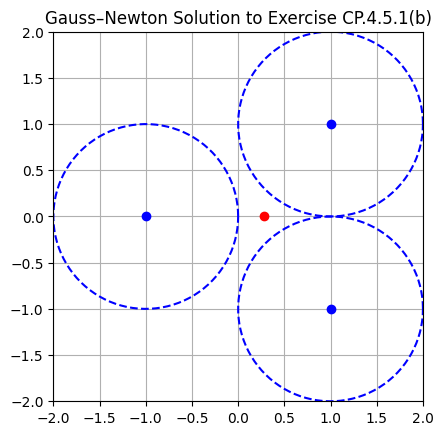

In [16]:
#4.5.1 b
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi

# New centers for 4.5.1(b)
x0 = np.array([-1., 0.]); R0 = 1.
x1 = np.array([1., 1.]); R1 = 1.
x2 = np.array([1., -1.]); R2 = 1.

# Residual function: distances to circles minus radius
f = lambda x: np.array([
    sqrt((x[0] - x0[0])**2 + (x[1] - x0[1])**2) - R0,
    sqrt((x[0] - x1[0])**2 + (x[1] - x1[1])**2) - R1,
    sqrt((x[0] - x2[0])**2 + (x[1] - x2[1])**2) - R2,
])

# Jacobian
J = lambda x: np.array([
    [
        (x[0] - x0[0]) / sqrt((x[0] - x0[0])**2 + (x[1] - x0[1])**2),
        (x[1] - x0[1]) / sqrt((x[0] - x0[0])**2 + (x[1] - x0[1])**2),
    ],
    [
        (x[0] - x1[0]) / sqrt((x[0] - x1[0])**2 + (x[1] - x1[1])**2),
        (x[1] - x1[1]) / sqrt((x[0] - x1[0])**2 + (x[1] - x1[1])**2),
    ],
    [
        (x[0] - x2[0]) / sqrt((x[0] - x2[0])**2 + (x[1] - x2[1])**2),
        (x[1] - x2[1]) / sqrt((x[0] - x2[0])**2 + (x[1] - x2[1])**2),
    ],
])

# Initial guess
x = np.array([0., 0.])

fx = f(x)

print("Iterative progress:")

for _ in range(10):
    Jx = J(x)
    JxTJx = Jx.T @ Jx
    x = x - np.linalg.solve(JxTJx, Jx.T @ fx)
    fx = f(x)
    rmse = np.linalg.norm(fx, 2) / sqrt(3.)
    print("x = [ ", f"{x[0]:.10f}", ",", f"{x[1]:.10f}", " ]", "    rmse = ", f"{rmse:.16f}")

# Plotting the circles and solution
theta = np.linspace(0., 2.*pi, 100)

for center, R in [(x0, R0), (x1, R1), (x2, R2)]:
    circle_x = R * np.cos(theta) + center[0]
    circle_y = R * np.sin(theta) + center[1]
    plt.plot(circle_x, circle_y, '--b')
    plt.plot(center[0], center[1], 'bo')

plt.plot(x[0], x[1], 'ro')

plt.xlim([-2.0, 2.0])
plt.ylim([-2.0, 2.0])
plt.grid()
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Gauss–Newton Solution to Exercise CP.4.5.1(b)")
plt.show()


#4.5.2 b

x = [ 0.2426406871 , 0.0000000000 , 0.2426406871 ]     rmse =  0.0096254467621564
x = [ 0.2499914156 , 0.0000000000 , 0.2499914156 ]     rmse =  0.0000112145867286
x = [ 0.2500000000 , 0.0000000000 , 0.2500000000 ]     rmse =  0.0000000000154031
x = [ 0.2500000000 , 0.0000000000 , 0.2500000000 ]     rmse =  0.0000000000000000


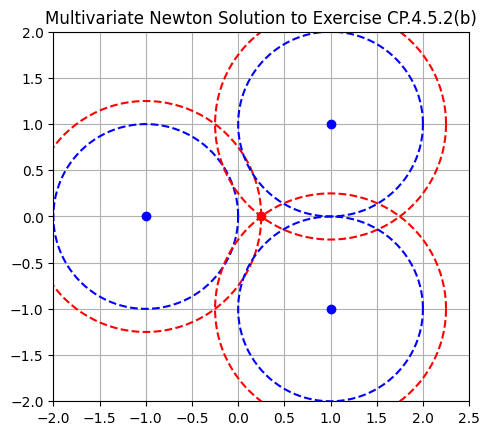

In [17]:
#4.5.2 b
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi

# New centers for CP.4.5.2(b)
x0 = np.array([-1., 0.]); R0 = 1.
x1 = np.array([1., 1.]); R1 = 1.
x2 = np.array([1., -1.]); R2 = 1.

# System of equations
f = lambda x: np.array([
    sqrt((x[0] - x0[0])**2 + (x[1] - x0[1])**2) - (R0 + x[2]),
    sqrt((x[0] - x1[0])**2 + (x[1] - x1[1])**2) - (R1 + x[2]),
    sqrt((x[0] - x2[0])**2 + (x[1] - x2[1])**2) - (R2 + x[2]),
])

# Jacobian
J = lambda x: np.array([
    [
        (x[0] - x0[0]) / sqrt((x[0] - x0[0])**2 + (x[1] - x0[1])**2),
        (x[1] - x0[1]) / sqrt((x[0] - x0[0])**2 + (x[1] - x0[1])**2),
        -1.
    ],
    [
        (x[0] - x1[0]) / sqrt((x[0] - x1[0])**2 + (x[1] - x1[1])**2),
        (x[1] - x1[1]) / sqrt((x[0] - x1[0])**2 + (x[1] - x1[1])**2),
        -1.
    ],
    [
        (x[0] - x2[0]) / sqrt((x[0] - x2[0])**2 + (x[1] - x2[1])**2),
        (x[1] - x2[1]) / sqrt((x[0] - x2[0])**2 + (x[1] - x2[1])**2),
        -1.
    ],
])

# Initial guess
x = np.array([0., 0., 0.])

fx = f(x)

# Newton iterations
for _ in range(4):
    Jx = J(x)
    delta = np.linalg.solve(Jx, fx)
    x = x - delta
    fx = f(x)
    rmse = np.linalg.norm(fx, 2) / sqrt(3.)
    print("x = [", f"{x[0]:.10f}", ",", f"{x[1]:.10f}", ",", f"{x[2]:.10f}", "]", "    rmse = ", f"{rmse:.16f}")

# Plotting the circles

theta = np.linspace(0., 2.*pi, 100)

# Original and new circles for each center
for center, R in [(x0, R0), (x1, R1), (x2, R2)]:
    # Original circle
    circle_x = R * np.cos(theta) + center[0]
    circle_y = R * np.sin(theta) + center[1]
    plt.plot(circle_x, circle_y, '--b')
    plt.plot(center[0], center[1], 'bo')

    # New circle with radius increased by K
    circle_x_new = (R + x[2]) * np.cos(theta) + center[0]
    circle_y_new = (R + x[2]) * np.sin(theta) + center[1]
    plt.plot(circle_x_new, circle_y_new, '--r')

# Plot optimal point
plt.plot(x[0], x[1], 'ro')

plt.xlim([-2.0, 2.5])
plt.ylim([-2.0, 2.0])
plt.grid()
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Multivariate Newton Solution to Exercise CP.4.5.2(b)")
plt.show()


#4.5.3 b

x = [ 0.0000000000 , 0.0000000000 , 1.0000000000 ]     rmse =  0.0000000000000000
x = [ 0.0000000000 , 0.0000000000 , 1.0000000000 ]     rmse =  0.0000000000000000
x = [ 0.0000000000 , 0.0000000000 , 1.0000000000 ]     rmse =  0.0000000000000000
x = [ 0.0000000000 , 0.0000000000 , 1.0000000000 ]     rmse =  0.0000000000000000
x = [ 0.0000000000 , 0.0000000000 , 1.0000000000 ]     rmse =  0.0000000000000000
x = [ 0.0000000000 , 0.0000000000 , 1.0000000000 ]     rmse =  0.0000000000000000
x = [ 0.0000000000 , 0.0000000000 , 1.0000000000 ]     rmse =  0.0000000000000000
x = [ 0.0000000000 , 0.0000000000 , 1.0000000000 ]     rmse =  0.0000000000000000
x = [ 0.0000000000 , 0.0000000000 , 1.0000000000 ]     rmse =  0.0000000000000000
x = [ 0.0000000000 , 0.0000000000 , 1.0000000000 ]     rmse =  0.0000000000000000


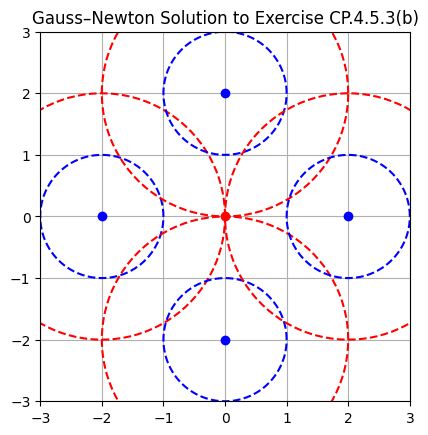

In [18]:
#4.5.3 b
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi

# New centers for CP.4.5.3(b)
x0 = np.array([-2., 0.]); R0 = 1.
x1 = np.array([0., 2.]); R1 = 1.
x2 = np.array([0., -2.]); R2 = 1.
x3 = np.array([2., 0.]); R3 = 1.

# Residuals
f = lambda x: np.array([
    sqrt((x[0] - x0[0])**2 + (x[1] - x0[1])**2) - (R0 + x[2]),
    sqrt((x[0] - x1[0])**2 + (x[1] - x1[1])**2) - (R1 + x[2]),
    sqrt((x[0] - x2[0])**2 + (x[1] - x2[1])**2) - (R2 + x[2]),
    sqrt((x[0] - x3[0])**2 + (x[1] - x3[1])**2) - (R3 + x[2]),
])

# Jacobian matrix
J = lambda x: np.array([
    [
        (x[0] - x0[0]) / sqrt((x[0] - x0[0])**2 + (x[1] - x0[1])**2),
        (x[1] - x0[1]) / sqrt((x[0] - x0[0])**2 + (x[1] - x0[1])**2),
        -1.
    ],
    [
        (x[0] - x1[0]) / sqrt((x[0] - x1[0])**2 + (x[1] - x1[1])**2),
        (x[1] - x1[1]) / sqrt((x[0] - x1[0])**2 + (x[1] - x1[1])**2),
        -1.
    ],
    [
        (x[0] - x2[0]) / sqrt((x[0] - x2[0])**2 + (x[1] - x2[1])**2),
        (x[1] - x2[1]) / sqrt((x[0] - x2[0])**2 + (x[1] - x2[1])**2),
        -1.
    ],
    [
        (x[0] - x3[0]) / sqrt((x[0] - x3[0])**2 + (x[1] - x3[1])**2),
        (x[1] - x3[1]) / sqrt((x[0] - x3[0])**2 + (x[1] - x3[1])**2),
        -1.
    ],
])

# Initial guess
x = np.array([0., 0., 0.])

fx = f(x)

# Gauss-Newton iterations
for _ in range(10):
    Jx = J(x)
    JxTJx = Jx.T @ Jx
    delta = np.linalg.solve(JxTJx, Jx.T @ fx)
    x = x - delta
    fx = f(x)
    rmse = np.linalg.norm(fx, 2) / sqrt(4.)
    print("x = [", f"{x[0]:.10f}", ",", f"{x[1]:.10f}", ",", f"{x[2]:.10f}", "]", "    rmse = ", f"{rmse:.16f}")

# Plotting

theta = np.linspace(0., 2.*pi, 100)

for center, R in [(x0, R0), (x1, R1), (x2, R2), (x3, R3)]:
    # Original circle
    circle_x = R * np.cos(theta) + center[0]
    circle_y = R * np.sin(theta) + center[1]
    plt.plot(circle_x, circle_y, '--b')
    plt.plot(center[0], center[1], 'bo')

    # Expanded circle
    circle_x_new = (R + x[2]) * np.cos(theta) + center[0]
    circle_y_new = (R + x[2]) * np.sin(theta) + center[1]
    plt.plot(circle_x_new, circle_y_new, '--r')

# Plot optimal point
plt.plot(x[0], x[1], 'ro')

plt.xlim([-3.0, 3.0])
plt.ylim([-3.0, 3.0])
plt.grid()
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Gauss–Newton Solution to Exercise CP.4.5.3(b)")
plt.show()


#4.5.4 b

x = [ -0.0834917486 , -0.0189142975 , 0.9543368464 ]     rmse =  0.0486220321978903
x = [ -0.0807848267 , -0.0196356916 , 0.9555826169 ]     rmse =  0.0485862962992723
x = [ -0.0808434067 , -0.0196414490 , 0.9555818745 ]     rmse =  0.0485862821950088
x = [ -0.0808418918 , -0.0196416409 , 0.9555819852 ]     rmse =  0.0485862821868665
x = [ -0.0808419272 , -0.0196416410 , 0.9555819834 ]     rmse =  0.0485862821868619
x = [ -0.0808419264 , -0.0196416410 , 0.9555819835 ]     rmse =  0.0485862821868618
x = [ -0.0808419264 , -0.0196416410 , 0.9555819835 ]     rmse =  0.0485862821868619
x = [ -0.0808419264 , -0.0196416410 , 0.9555819835 ]     rmse =  0.0485862821868618
x = [ -0.0808419264 , -0.0196416410 , 0.9555819835 ]     rmse =  0.0485862821868618
x = [ -0.0808419264 , -0.0196416410 , 0.9555819835 ]     rmse =  0.0485862821868617


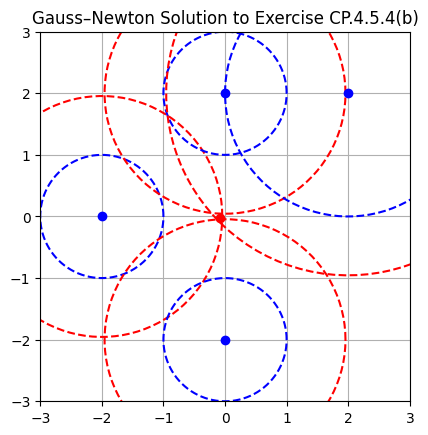

In [1]:
#4.5.4 b
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi

# New circle centers and radii for CP.4.5.4(b)
x0 = np.array([-2., 0.]); R0 = 1.
x1 = np.array([0., 2.]); R1 = 1.
x2 = np.array([0., -2.]); R2 = 1.
x3 = np.array([2., 2.]); R3 = 2.

# Residuals
f = lambda x: np.array([
    sqrt((x[0] - x0[0])**2 + (x[1] - x0[1])**2) - (R0 + x[2]),
    sqrt((x[0] - x1[0])**2 + (x[1] - x1[1])**2) - (R1 + x[2]),
    sqrt((x[0] - x2[0])**2 + (x[1] - x2[1])**2) - (R2 + x[2]),
    sqrt((x[0] - x3[0])**2 + (x[1] - x3[1])**2) - (R3 + x[2]),
])

# Jacobian matrix
J = lambda x: np.array([
    [
        (x[0] - x0[0]) / sqrt((x[0] - x0[0])**2 + (x[1] - x0[1])**2),
        (x[1] - x0[1]) / sqrt((x[0] - x0[0])**2 + (x[1] - x0[1])**2),
        -1.
    ],
    [
        (x[0] - x1[0]) / sqrt((x[0] - x1[0])**2 + (x[1] - x1[1])**2),
        (x[1] - x1[1]) / sqrt((x[0] - x1[0])**2 + (x[1] - x1[1])**2),
        -1.
    ],
    [
        (x[0] - x2[0]) / sqrt((x[0] - x2[0])**2 + (x[1] - x2[1])**2),
        (x[1] - x2[1]) / sqrt((x[0] - x2[0])**2 + (x[1] - x2[1])**2),
        -1.
    ],
    [
        (x[0] - x3[0]) / sqrt((x[0] - x3[0])**2 + (x[1] - x3[1])**2),
        (x[1] - x3[1]) / sqrt((x[0] - x3[0])**2 + (x[1] - x3[1])**2),
        -1.
    ],
])

# Initial guess
x = np.array([0., 0., 0.])

fx = f(x)

# Gauss-Newton iterations
for _ in range(10):
    Jx = J(x)
    JxTJx = Jx.T @ Jx
    delta = np.linalg.solve(JxTJx, Jx.T @ fx)
    x = x - delta
    fx = f(x)
    rmse = np.linalg.norm(fx, 2) / sqrt(4.)
    print("x = [", f"{x[0]:.10f}", ",", f"{x[1]:.10f}", ",", f"{x[2]:.10f}", "]", "    rmse = ", f"{rmse:.16f}")

# Plotting

theta = np.linspace(0., 2.*pi, 100)

for center, R in [(x0, R0), (x1, R1), (x2, R2), (x3, R3)]:
    # Original circle
    circle_x = R * np.cos(theta) + center[0]
    circle_y = R * np.sin(theta) + center[1]
    plt.plot(circle_x, circle_y, '--b')
    plt.plot(center[0], center[1], 'bo')

    # Expanded circle
    circle_x_new = (R + x[2]) * np.cos(theta) + center[0]
    circle_y_new = (R + x[2]) * np.sin(theta) + center[1]
    plt.plot(circle_x_new, circle_y_new, '--r')

# Plot optimal point
plt.plot(x[0], x[1], 'ro')

plt.xlim([-3.0, 3.0])
plt.ylim([-3.0, 3.0])
plt.grid()
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Gauss–Newton Solution to Exercise CP.4.5.4(b)")
plt.show()


#4.5.8

c = [ 2.6585365854 , 0.0000000000 ]    nrm_r = 15.8398151567460239
c = [ 6.5993826570 , -0.2337029337 ]    nrm_r = 15.9354138848874580
c = [ 8.7663801956 , -0.1763814294 ]    nrm_r = 4.9479208424145531
c = [ 9.4589676742 , -0.2082247562 ]    nrm_r = 0.9329019111531756
c = [ 9.7010771789 , -0.2134201080 ]    nrm_r = 0.7599109655083411
c = [ 9.7697207606 , -0.2146044155 ]    nrm_r = 0.7457615961811015
c = [ 9.7892002467 , -0.2149492749 ]    nrm_r = 0.7446223638671672
c = [ 9.7947327947 , -0.2150479325 ]    nrm_r = 0.7445305543783107
c = [ 9.7963044656 , -0.2150760152 ]    nrm_r = 0.7445231479368379
c = [ 9.7967509663 , -0.2150839978 ]    nrm_r = 0.7445225502343411

RMSE = 0.2632


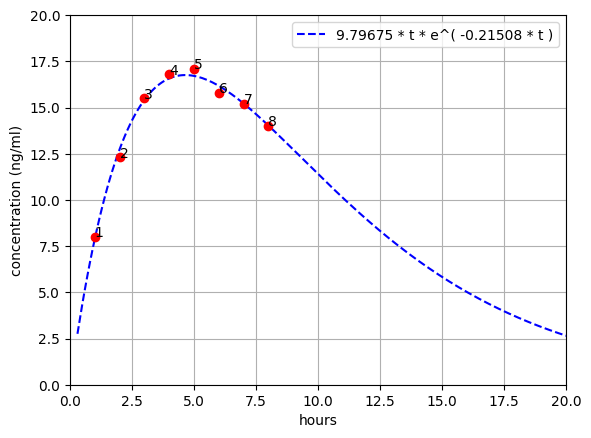

In [2]:
#4.5.8
import numpy as np
from math import sqrt, exp
import matplotlib.pyplot as plt

data = np.array([
   [  1.,  8.0 ],
   [  2., 12.3 ],
   [  3., 15.5 ],
   [  4., 16.8 ],
   [  5., 17.1 ],
   [  6., 15.8 ],
   [  7., 15.2 ],
   [  8., 14.0 ]
])

t = data[:, 0]
y = data[:, 1]

# Residual vector
f = lambda c: c[0] * t * np.exp(c[1] * t) - y

# Jacobian matrix
J = lambda c: np.column_stack([
    t * np.exp(c[1] * t),                         # ∂f/∂c1
    c[0] * t**2 * np.exp(c[1] * t)                # ∂f/∂c2
])

# Initial guess
c = np.array([0., 0.])
lbda = 1.

fc = f(c)

for _ in range(10):
    Jc = J(c)
    JcTJc = Jc.T @ Jc
    JcTJc_plI = JcTJc + lbda * np.eye(Jc.shape[1])

    # Levenberg–Marquardt step
    delta = np.linalg.solve(JcTJc_plI, Jc.T @ fc)
    c = c - delta

    fc = f(c)
    nrm_r = np.linalg.norm(fc, 2)
    print("c = [", f"{c[0]:.10f}", ",", f"{c[1]:.10f}", "]", "   nrm_r =", f"{nrm_r:.16f}")

rmse = np.linalg.norm(fc, 2) / sqrt(t.shape[0])
print("\nRMSE =", f"{rmse:.4f}")

# Plotting
xxx = np.linspace(0.3, 20.3, 200)
yyy = c[0] * xxx * np.exp(c[1] * xxx)

plt.plot(xxx, yyy, '--b', label=f'{c[0]:7.5f} * t * e^( {c[1]:7.5f} * t )')
plt.plot(t, y, 'ro')
for i in range(len(t)):
    plt.text(t[i], y[i], f"{t[i]:.0f}")

plt.legend()
plt.xlabel('hours')
plt.ylabel('concentration (ng/ml)')
plt.xlim([0., 20.])
plt.ylim([0., 20.])
plt.grid()
plt.show()


#4.5.11 b

c = [ 1.0381434851 , 0.9417023358 , -0.0755406128 , 0.9065752899 ]    nrm_r = 8.2601766045893399
c = [ 1.1159474799 , 0.7773004106 , -0.2167716012 , 0.8298495494 ]    nrm_r = 8.1714703639429729
c = [ 1.2420556437 , 0.4460856940 , -0.2890277650 , 0.7794268789 ]    nrm_r = 7.8793177490393393
c = [ 1.4601874594 , -0.3477255730 , -0.2545299804 , 0.7858482065 ]    nrm_r = 15.4042408552504639
c = [ 1.8909101266 , -0.1625650451 , -0.2344610828 , 0.5351251873 ]    nrm_r = 7.0828406366332368
c = [ 2.0982957522 , -0.1596541733 , -0.3280952646 , 0.4690255757 ]    nrm_r = 3.8276754066693939
c = [ 2.3151851779 , -0.1448195071 , -0.3409270304 , 0.6210226509 ]    nrm_r = 3.5324944815043411
c = [ 2.5112978405 , -0.1236315184 , -0.3620995499 , 0.7370159481 ]    nrm_r = 3.3752190468358765
c = [ 2.6873880944 , -0.1062109364 , -0.3835014784 , 0.8516774860 ]    nrm_r = 3.2339694804616848
c = [ 2.8523662643 , -0.0905609030 , -0.4047403581 , 0.9637411315 ]    nrm_r = 3.1014108819196400
c = [ 3.0110075559 , -

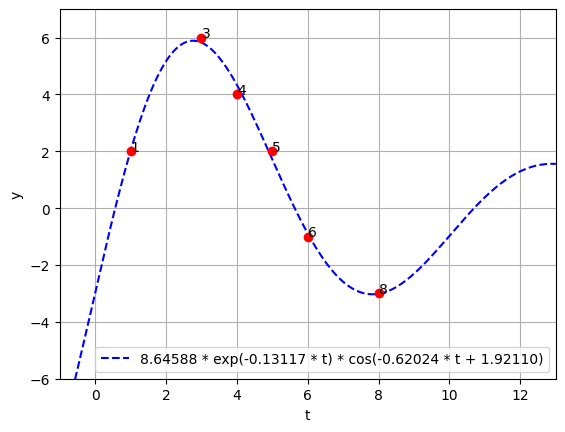

In [3]:
#4.5.11 b
import numpy as np
from math import sqrt, exp, cos, sin
import matplotlib.pyplot as plt

data = np.array([
    [1., 2.],
    [3., 6.],
    [4., 4.],
    [5., 2.],
    [6., -1.],
    [8., -3.]
])

t = data[:, 0]
y = data[:, 1]

# Residual vector
def f(c):
    return c[0] * np.exp(-c[1] * t) * np.cos(c[2] * t + c[3]) - y

# Jacobian matrix
def J(c):
    e_term = np.exp(-c[1] * t)
    cos_term = np.cos(c[2] * t + c[3])
    sin_term = np.sin(c[2] * t + c[3])

    J_matrix = np.zeros((t.shape[0], 4))
    J_matrix[:, 0] = e_term * cos_term                                  # df/dc1
    J_matrix[:, 1] = -c[0] * t * e_term * cos_term                      # df/dc2
    J_matrix[:, 2] = -c[0] * t * e_term * sin_term                      # df/dc3
    J_matrix[:, 3] = -c[0] * e_term * sin_term                          # df/dc4

    return J_matrix

# Initial guess
c = np.array([1., 1., 0.1, 1.])
lbda = 10.

fc = f(c)

for _ in range(300):
    Jc = J(c)
    JcTJc = Jc.T @ Jc
    JcTJc_plI = JcTJc + lbda * np.eye(Jc.shape[1])

    delta = np.linalg.solve(JcTJc_plI, Jc.T @ fc)
    c = c - delta

    fc = f(c)
    nrm_r = np.linalg.norm(fc, 2)
    print("c = [", f"{c[0]:.10f}", ",", f"{c[1]:.10f}", ",", f"{c[2]:.10f}", ",", f"{c[3]:.10f}", "]",
          "   nrm_r =", f"{nrm_r:.16f}")

rmse = np.linalg.norm(fc, 2) / sqrt(t.shape[0])
print("\nRMSE =", f"{rmse:.4f}")

# Plotting

xxx = np.linspace(-1., 13., 200)
yyy = c[0] * np.exp(-c[1] * xxx) * np.cos(c[2] * xxx + c[3])

plt.plot(xxx, yyy, '--b',
         label=f'{c[0]:.5f} * exp(-{c[1]:.5f} * t) * cos({c[2]:.5f} * t + {c[3]:.5f})')
plt.plot(t, y, 'ro')
for i in range(len(t)):
    plt.text(t[i], y[i], f"{int(t[i])}")

plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.xlim([-1., 13.])
plt.ylim([-6., 7.])
plt.grid()
plt.show()
